In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import date
from datetime import timedelta

In [18]:
Grades = pd.read_csv(r"Desktop/grades.csv")

# DESCRIPTIVE STATS AND CLEANING THE DATA

In [19]:
Grades.head(10)

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,0,100,A
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,6,94,A
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,6,94,A
3,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,12,88,B
4,20285,2/24/2012 14:46,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 10:32,2,98,A
5,18111,5/11/2012 10:10,12/31/2012 23:59,Inactive,RF,Retail Food,HE_Filed,1/3/2012 10:37,2,98,A
6,76109,7/19/2012 12:58,12/31/2018 23:59,Active,RF,Retail Food,HE_Fail,1/3/2012 10:44,16,84,B
7,18870,3/15/2012 10:19,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 10:46,0,100,A
8,25877,1/3/2012 14:09,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,1/3/2012 10:47,32,68,C
9,19921,3/6/2012 9:35,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Filed,1/3/2012 10:48,4,96,A


In [20]:
Grades.dropna(inplace=True)

In [21]:
Grades.describe()

,LICENSENO,SUM_VIOLATIONS,SCORE
count,72243.000000,72243.000000,72243.000000
mean,58498.182108,8.642346,91.357654
std,59463.612719,15.921356,15.921356
min,54.000000,0.000000,-147.000000
25%,22112.000000,0.000000,88.000000
50%,28452.000000,0.000000,100.000000
75%,78079.000000,12.000000,100.000000
max,367152.000000,247.000000,100.000000


# CREATING A GRAPH THAT SHOWS TIME BETWEEN INSPECTIONS

In [22]:
Grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72243 entries, 0 to 72242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LICENSENO       72243 non-null  int64 
 1   ISSDTTM         72243 non-null  object
 2   EXPDTTM         72243 non-null  object
 3   LICSTATUS       72243 non-null  object
 4   LICENSECAT      72243 non-null  object
 5   DESCRIPT        72243 non-null  object
 6   RESULT          72243 non-null  object
 7   RESULTDTTM      72243 non-null  object
 8   SUM_VIOLATIONS  72243 non-null  int64 
 9   SCORE           72243 non-null  int64 
 10  GRADE           72243 non-null  object
dtypes: int64(3), object(8)
memory usage: 6.6+ MB


In [23]:
## I am going to change 'RESULTDTTM' to DateTime.
Grades['RESULTDTTM']=pd.to_datetime(Grades['RESULTDTTM'], infer_datetime_format=True)
Grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72243 entries, 0 to 72242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   LICENSENO       72243 non-null  int64         
 1   ISSDTTM         72243 non-null  object        
 2   EXPDTTM         72243 non-null  object        
 3   LICSTATUS       72243 non-null  object        
 4   LICENSECAT      72243 non-null  object        
 5   DESCRIPT        72243 non-null  object        
 6   RESULT          72243 non-null  object        
 7   RESULTDTTM      72243 non-null  datetime64[ns]
 8   SUM_VIOLATIONS  72243 non-null  int64         
 9   SCORE           72243 non-null  int64         
 10  GRADE           72243 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 6.6+ MB


In [24]:
Grades['time_between_inspections'] = Grades.groupby('LICENSENO')['RESULTDTTM'].diff()


In [25]:
Grades2 = pd.DataFrame(Grades, columns= ['LICENSENO','RESULTDTTM', 'time_between_inspections'])

In [26]:
Grades2["time_between_inspections"] = Grades2["time_between_inspections"].dt.days

In [27]:
pd.set_option('display.max_rows', None)

In [28]:
Grades2.sort_values(by= ['LICENSENO', 'RESULTDTTM'])[:10]

,LICENSENO,RESULTDTTM,time_between_inspections
10164,54,2012-12-30 00:00:00,NaN
10165,4032,2012-12-30 00:00:00,NaN
379,4036,2012-01-13 13:15:00,NaN
5741,4036,2012-07-20 12:47:00,188.0
9596,4036,2012-12-03 13:08:00,136.0
18896,4036,2013-05-30 10:34:00,177.0
19367,4036,2013-06-18 10:52:00,19.0
19506,4036,2013-06-21 11:28:00,3.0
29957,4036,2014-05-19 10:33:00,331.0
40961,4036,2015-07-28 14:17:00,435.0


In [29]:
Grades2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72243 entries, 0 to 72242
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LICENSENO                 72243 non-null  int64         
 1   RESULTDTTM                72243 non-null  datetime64[ns]
 2   time_between_inspections  64685 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


(0.0, 1000.0)

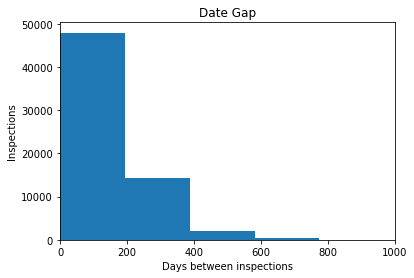

In [30]:
#GRAPH THE NUMBER OF DAYS BETWEEN INSPECTIONS. 
#MOST RESTAURANT RE-INSPECTIONS HAPPEN WITHIN 200 DAYS OF THE FIRST INSPECTION
plt.hist(Grades2['time_between_inspections'], bins = 10);
plt.title('Date Gap')
plt.xlabel('Days between inspections')
plt.ylabel('Inspections')
plt.xlim((0,1000))

# LOOKING MORE CLOSELY AT THE DATA TO FIND TRENDS

In [31]:
Cat_grade = pd.DataFrame(Grades, columns=['DESCRIPT', 'GRADE', 'SCORE'])

In [32]:
Cat_grade.head(10)

,DESCRIPT,GRADE,SCORE
0,Eating & Drinking w/ Take Out,A,100
1,Eating & Drinking,A,94
2,Retail Food,A,94
3,Retail Food,B,88
4,Eating & Drinking,A,98
5,Retail Food,A,98
6,Retail Food,B,84
7,Eating & Drinking w/ Take Out,A,100
8,Eating & Drinking,C,68
9,Eating & Drinking w/ Take Out,A,96


In [33]:
Cat_grade.DESCRIPT.value_counts()
#EATING AND DRINKING HAD THE MOST INSPECTIONS

Eating & Drinking                30780
Eating & Drinking w/ Take Out    26971
Retail Food                      13091
Mobile Food Walk On               1401
Name: DESCRIPT, dtype: int64

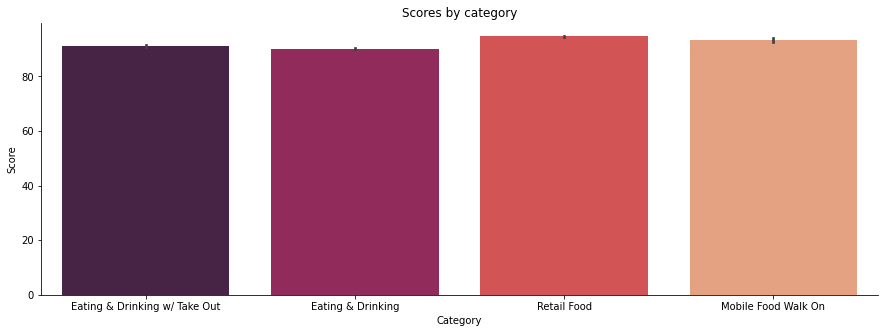

In [34]:
#LOOK AT THE OVERALL SCORES PER CATEGORY. 
#FROM HIGHEST TO LOWEST: RETAIL FOOD MOBILE FOOD WALK ON, EATING AND DRINKING, EATING AND DRINKING W/TAKEOUT
fig, _ = plt.subplots()
fig.set_size_inches(15, 5)
sns.despine()
_ = sns.barplot(x=Cat_grade.DESCRIPT, y=Cat_grade.SCORE, palette='rocket')
plt.xlabel("Category")
plt.ylabel("Score")
plt.title("Scores by category")
plt.show(fig)

In [35]:
#EATING AND DRINKING HAD THE LOWEST SCORES, WHEREAS RETAIL FOOD HAD THE HIGHEST SCORES

[]

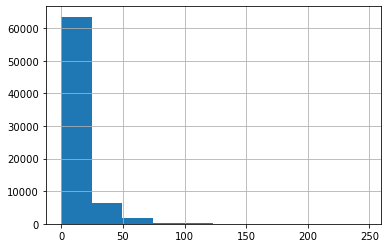

In [36]:
#THE TOTAL SUM OF THE POINTS THE FOOD ESTABLISHMENT RECEIVED IN  VIOLATIONS.
#WE CAN SEE HERE THAT THE MAJORITY OF FOOD ESTABLISHMENTS RECEIVED VIOLATIONS UNDER 50 (THE MAJORITY WERE UNDER 25).
Grades['SUM_VIOLATIONS'].hist().plot()

[]

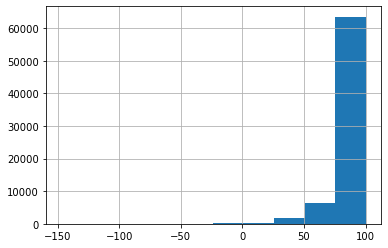

In [37]:
#GET THE RAW SCORES
#HERE WE CAN SEE THAT THE MAJORITY OF ESTABLISHMENTS ENDED UP GETTING A GOOD GRADE
#REMEMBER SCORE=100-SUM_VIOLATIONS
Grades['SCORE'].hist().plot()

In [38]:
#LOOK AT THE DISTRIBUTION OF GRADES OVERALL
#THIS FURTHER CONFIRMS THAT THE MAJORITY OF ESTABLISHMENTS GOT A GRADE OF AN A
Grade_distribution = Grades.groupby('GRADE').size()
pd.DataFrame({'Count of restaurant grade totals':Grade_distribution.values}, index=Grade_distribution.index)

,Count of restaurant grade totals
GRADE,
A,49937
B,10479
C,11827


[]

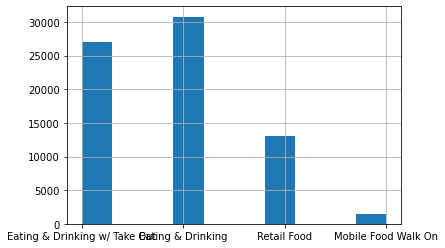

In [39]:
#GROUP BY ESTABLISHMENT TYPE AND COUNT # IN EACH CATEGORY
#THEN SORT FROM HIGHEST # TO LOWEST AND CREATE A BAR GRAPH
#THERE ARE MORE EATING AND DRINKING ESTABLISHMENTS being inspected
temp = Grades.groupby('DESCRIPT').size()
description_distribution = pd.DataFrame({'Count':temp.values}, index=temp.index)
Grades['DESCRIPT'].hist().plot()

In [40]:
#EATING AND DRINKING ESTABLISHMENTS GOT THE MOST NUMBER OF INSPECTIONS AND THEY ALSO HAVE THE LOWEST OVERALL SCORES
#FOLLOWED BY EATING AND DRINKING WITH TAKEOUT!

In [41]:
#Grouping and performing count over each group
Establishments =  Grades.groupby('LICENSENO')['LICENSENO'].count()

In [42]:
Establishments.describe()
#The max number of inspections for one establishment is 54
#The mean is 9.5
#The min is 1

count    7558.000000
mean        9.558481
std         8.459523
min         1.000000
25%         2.000000
50%         8.000000
75%        15.000000
max        54.000000
Name: LICENSENO, dtype: float64

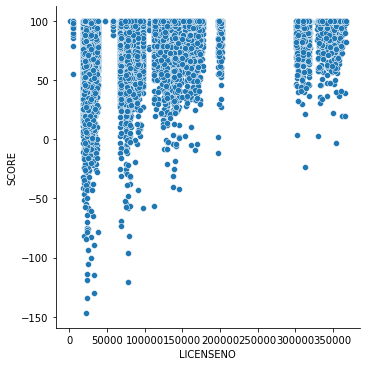

In [43]:
sns.relplot(x="LICENSENO", y="SCORE", data=Grades)


# LOOKING AT DATA FOR ESTABLISHMENTS WITH A GRADE OF C

In [44]:
Grade_C = Grades[(Grades['SCORE'] <= 80)]
Grade_C.head(5)

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,time_between_inspections
8,25877,1/3/2012 14:09,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,2012-01-03 10:47:00,32,68,C,NaT
13,22999,1/25/2012 13:35,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,2012-01-03 11:15:00,48,52,C,NaT
14,20767,12/29/2011 12:34,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,2012-01-03 11:17:00,26,74,C,NaT
17,75776,12/8/2011 11:27,12/31/2018 23:59,Active,RF,Retail Food,HE_Fail,2012-01-03 11:23:00,20,80,C,NaT
24,24233,12/30/2011 10:03,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Fail,2012-01-03 12:08:00,40,60,C,NaT


In [45]:
Result_C = pd.DataFrame(Grade_C, columns=['RESULT', 'DESCRIPT'])
Result_C.head(5)

,RESULT,DESCRIPT
8,HE_Fail,Eating & Drinking
13,HE_Fail,Eating & Drinking w/ Take Out
14,HE_Fail,Eating & Drinking
17,HE_Fail,Retail Food
24,HE_Fail,Eating & Drinking w/ Take Out


In [46]:
Result_C.shape

(11827, 2)

In [47]:
Descriptive_Results_C =  Result_C.groupby('RESULT')['RESULT'].count()
print(Descriptive_Results_C)

RESULT
HE_Fail       10593
HE_FailExt      439
HE_Filed          5
HE_Hearing      508
HE_NotReq         1
HE_OutBus        18
HE_TSOP         263
Name: RESULT, dtype: int64


<AxesSubplot:xlabel='RESULT'>

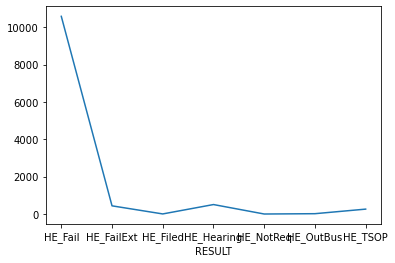

In [48]:
#OF THE ESTABLISHMENTS THAT GOT A GRADE C, THE MAJORITY OF THEM FAILED(779/881) AND 47 OF THE RE-EXTENTIONS FAILED.
#43 OF THE ESTABLISHMENTS NEEDED A HEARING
#9 WERE TEMPORARILY SHUT DOWN BY ORDER OF HEALTH DEPARTMENT
Descriptive_Results_C.plot()

In [49]:
Grade_B = Grades[(Grades['SCORE'] >= 81)
                        & (Grades['SCORE'] < 93)]
Grade_B.head(5)

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,time_between_inspections
3,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,2012-01-03 10:07:00,12,88,B,NaT
6,76109,7/19/2012 12:58,12/31/2018 23:59,Active,RF,Retail Food,HE_Fail,2012-01-03 10:44:00,16,84,B,NaT
11,21466,2/6/2012 13:35,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Fail,2012-01-03 10:53:00,8,92,B,NaT
12,23261,1/11/2012 13:58,12/31/2018 23:59,Active,RF,Retail Food,HE_Fail,2012-01-03 11:05:00,14,86,B,NaT
16,26632,2/6/2012 15:00,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Fail,2012-01-03 11:22:00,10,90,B,NaT


In [50]:
Result_B = pd.DataFrame(Grade_B, columns=['RESULT', 'DESCRIPT'])
Result_B.head(5)

,RESULT,DESCRIPT
3,HE_FailExt,Retail Food
6,HE_Fail,Retail Food
11,HE_Fail,Eating & Drinking w/ Take Out
12,HE_Fail,Retail Food
16,HE_Fail,Eating & Drinking w/ Take Out


In [51]:
Descriptive_Results_B =  Result_B.groupby('RESULT')['RESULT'].count()
print(Descriptive_Results_B)

RESULT
HE_Fail       8287
HE_FailExt    1070
HE_Filed       191
HE_Hearing     578
HE_NotReq        2
HE_OutBus       12
HE_Pass          1
HE_TSOP        105
Name: RESULT, dtype: int64


<AxesSubplot:xlabel='RESULT'>

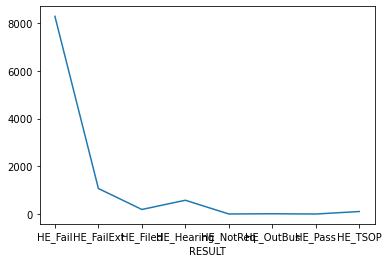

In [52]:
Descriptive_Results_B.plot()

In [53]:
Grade_A = Grades[(Grades['SCORE'] >= 94)]              
Grade_A.head(5)


,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,time_between_inspections
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,2012-01-03 07:26:00,0,100,A,NaT
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2012-01-03 09:42:00,6,94,A,NaT
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,2012-01-03 10:06:00,6,94,A,NaT
4,20285,2/24/2012 14:46,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2012-01-03 10:32:00,2,98,A,NaT
5,18111,5/11/2012 10:10,12/31/2012 23:59,Inactive,RF,Retail Food,HE_Filed,2012-01-03 10:37:00,2,98,A,NaT


In [54]:
Result_A = pd.DataFrame(Grade_A, columns=['RESULT', 'DESCRIPT'])
Result_A.head(5)


,RESULT,DESCRIPT
0,HE_Pass,Eating & Drinking w/ Take Out
1,HE_Filed,Eating & Drinking
2,HE_Fail,Retail Food
4,HE_Filed,Eating & Drinking
5,HE_Filed,Retail Food


In [55]:
Descriptive_Results_A =  Result_A.groupby('RESULT')['RESULT'].count()
print(Descriptive_Results_A)


RESULT
HE_Fail        2405
HE_FailExt     1476
HE_Filed       9295
HE_Hearing      306
HE_NotReq      7259
HE_OutBus       290
HE_Pass       28827
HE_TSOP          79
Name: RESULT, dtype: int64


<AxesSubplot:xlabel='RESULT'>

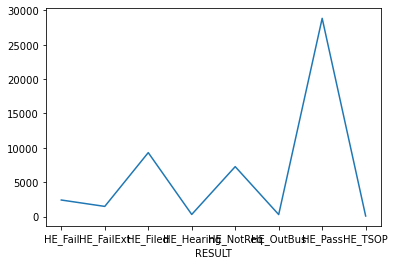

In [56]:
Descriptive_Results_A.plot()

# FILTERING FOR 2018

In [57]:

Grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72243 entries, 0 to 72242
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   LICENSENO                 72243 non-null  int64          
 1   ISSDTTM                   72243 non-null  object         
 2   EXPDTTM                   72243 non-null  object         
 3   LICSTATUS                 72243 non-null  object         
 4   LICENSECAT                72243 non-null  object         
 5   DESCRIPT                  72243 non-null  object         
 6   RESULT                    72243 non-null  object         
 7   RESULTDTTM                72243 non-null  datetime64[ns] 
 8   SUM_VIOLATIONS            72243 non-null  int64          
 9   SCORE                     72243 non-null  int64          
 10  GRADE                     72243 non-null  object         
 11  time_between_inspections  64685 non-null  timedelta64[ns]
dtypes: d

In [58]:
Grades.shape

(72243, 12)

In [60]:
Grades2018 = Grades.loc[(Grades['RESULTDTTM'] >= '2018-06-23')
                        & (Grades['RESULTDTTM'] < '2018-06-30')]
Grades2018.head(5)


,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,time_between_inspections
72070,21898,1/3/2012 13:57,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2018-06-23 08:03:00,2,98,A,11 days 22:43:00
72071,332685,1/16/2018 9:00,12/31/2018 23:59,Active,MFW,Mobile Food Walk On,HE_Pass,2018-06-23 10:53:00,0,100,A,59 days 23:27:00
72072,346939,10/27/2017 8:01,12/31/2018 23:59,Active,RF,Retail Food,HE_Pass,2018-06-25 09:37:00,0,100,A,185 days 20:24:00
72073,79244,2/1/2013 8:49,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Pass,2018-06-25 10:34:00,0,100,A,475 days 02:21:00
72074,25780,2/15/2012 15:29,12/31/2018 23:59,Active,RF,Retail Food,HE_Pass,2018-06-25 10:52:00,0,100,A,3 days 23:36:00


In [61]:
Grades_june2018 = pd.DataFrame(Grades2018, columns=['RESULTDTTM', 'SCORE'])
Grades_june2018.head(5)

,RESULTDTTM,SCORE
72070,2018-06-23 08:03:00,98
72071,2018-06-23 10:53:00,100
72072,2018-06-25 09:37:00,100
72073,2018-06-25 10:34:00,100
72074,2018-06-25 10:52:00,100


In [62]:
Grades2018.shape

(173, 12)

In [63]:
Grades_june2018 = pd.DataFrame(Grades2018, columns=['SCORE', 'SUM_VIOLATIONS'])

<AxesSubplot:>

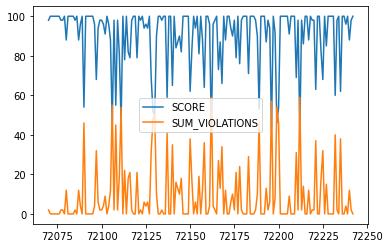

In [64]:
#HERE, I TRIED TO MAKE A PLOT GRAPH USING THE DATA OF JUNE 2018 BY DAY. 
#THERE WERE A TOTAL OF 173 INSPECTIONS DURING THIS TIME FRAME.
#I TRIED TO HAVE THE X-AXIS ORDERED BY DATE, BUT COULD NOT FIGURE OUT HOW TO MAKE IT WORK.
#I WOULD HAVE LOOKED AT SEASONALITY AND TREND OVER SEVERAL YEARS BUT AN ERROR MESSAGE KEPT COMING UP SAYING THAT THE DATA WAS TOO LARGE.
Grades_june2018.plot()